## 01 데이터에서 인사이트 발견하기

### 1.1 탐색적 데이터 분석의 과정

#### 데이터와의 첫 만남

raw data : 아직 분석에 활용된 적이 없는 혹은 정제되지 않은 데이터

탐색적 데이터 분석은 데이터를 열어보는 상황에서부터 시작되며 다음과 같은 과정 수행

    1. 데이터의 출처와 주제에 대해 이해합니다.
    2. 데이터의 크기를 알아봅니다.
    3. 데이터의 구성 요소(피처)를 살펴봅니다.

#### 데이터의 속성 탐색하기

- 피처의 속성 탐색

    가장 중요한 것은 '데이터에 질문을 던지는 것'. 피치의 속성 탐색은 '우리 반의 평균 키는 몇이나 될까?'와 같은 질문에서부터 출발하기 때문



- 피처 간의 상관 관계 탐색

    학급의 신체검사 데이터를 살펴봄 -> '우리 학급은 비만이 아닐까?' -> '몸무게' 피처 살펴봄 -> 가정 확인
    
    but, 몸무게는 키와도 관계가 있음 -> 이런 상황에서 필요한 것이 피처 간의 상관 관계 탐색
    
    피처 간의 공분산, 혹은 상관 계수와 같은 개념 포함

#### 탐색한 데이터의 시각화

데이터 시각화는 수치적 자료만 가지고는 파악하기 힘든 패턴이나 인사이트를 발현하는 데 유용

### 1.2 멕시코풍 프랜차이즈 chipotle의 주문 데이터 분석하기

#### Step1. 탐색 : 데이터의 기초 정보 살펴보기

##### chipotle 데이터셋의 기초 정보 출력하기

In [5]:
import pandas as pd

file_path = 'python-data-analysis-master/data/chipotle.tsv'
# read_csv() 함수로 데이터를 데이터 프레임 형태로 불러옵니다.
chipo = pd.read_csv(file_path, sep = '\t')

print(chipo.shape) # shape : 데이터의 행과 열의 크기를 반환
print("-----------------------------")
print(chipo.info()) # info() : 행과 열의 구성 정보


## '../data/...' 에서 맨 앞의 ..은 한 폴더 위 라는 의미

(4622, 5)
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


##### chipotle 데이터셋의 행과 열, 데이터 확인하기

In [12]:
# chipo라는 데이터 프레임에서 순서대로 10개의 데이터를 보여줍니다.
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [11]:
print(chipo.columns)
print("-------------------------------------")
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
-------------------------------------
RangeIndex(start=0, stop=4622, step=1)


order_id : 주문 번호

quantity : 아이템의 주문 수량

item_name : 주문한 아이템의 이름

choice_description : 주문한 아이템의 상세 선택 옵션

item_price : 주문 아이템의 가격 정보

##### quantity와 item_price의 수치적 특징

quantity와 item_price는 연속성 피처(키와 몸무게처럼 어떠한 값도 가질 수 있는 연속적인 숫자 형태)

describe() : 피처의 기초 통계량

but, 현재 유일한 수치형 피처는 quantity 뿐이기 때문에 오직 quantity에 대한 정보만을 출력할 수 있음

##### describe() 함수로 기초 통계량 출력하기

In [14]:
# order_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환합니다.
chipo['order_id'] = chipo['order_id'].astype(str)
print(chipo.describe()) # chipo 데이터 프레임에서 수치형 피처들의 기초 통계량을 확인합니다.

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


평균 주문 수량(mean)은 약 1.07

-> 대부분이 한 아이템에 대해서 1개 정도만 주문했다는 것이고, '한 사람이 같은 메뉴를 여러 개 구매하는 경우는 많지 않다.'는 인사이트를 얻을 수 있음

그렇다면 item_price의 수치적 특징은 어떻게 알아볼 수 있을까?

현재 item_price 피처는 object 타입이기 때문에 describe() 함수로 기초 통계량을 확인할 수 없음

따라서 추가적인 데이터 전처리 작업이 필요

##### order_id와 item_name의 개수

order_id와 item_name의 개수 탐색

두 피처는 범주형 피처이기 때문에 unique() 함수 사용

##### unique() 함수로 범주형 피처의 개수 출력하기

In [17]:
print(len(chipo['order_id'].unique())) # order_id의 개수를 출력합니다.
print(len(chipo['item_name'].unique())) # item_name의 개수를 출력합니다.

1834
50


#### Step2. 인사이트의 발견 : 탐색과 시각화하기

##### 가장 많이 주문한 아이템 Top 10 출력하기

In [18]:
# 가장 많이 주문한 아이템 Top 10을 출력합니다.
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1) :
    print("Top", idx, ":", val, cnt)

    
## iteritems() : 행 번호와 값을 출력

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


##### 아이템별 주문 개수와 총량 구하기

In [19]:
# 아이템별 주문 개수를 출력합니다.
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10] # 아이템별 주문 개수를 출력합니다.

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

groupby() : 데이터 프레임에서 특정 피처를 기준으로 그룹을 생성하며 이를 통해 그룹별 연산을 적용

예를 들어 '학급'이라는 그룹을 만들었을 때, '학급별 평균 키', '학급별 평균 몸무게' 등을 구하는 것

In [20]:
# 아이템별 주문 총량을 출력합니다.
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10] # 아이템별 주문 총량을 출력합니다.

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

#### 시각화

##### 시각화로 분석 결과 살펴보기

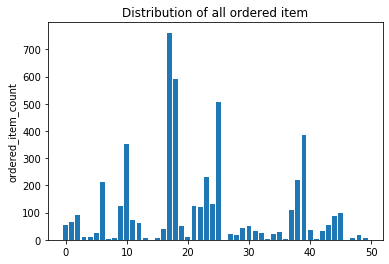

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align = 'center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

plt.show()